# Trabajando con data 3

## Lección 42 Groupby en data frames

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from numpy.random import randn
from numpy import nan

In [14]:
df = DataFrame({
    'k1': ['X','X','Y','Y','Z'],
    'k2': ['alpha', 'beta', 'alpha', 'beta', 'alpha'],
    'dataset1': randn(5),
    'dataset2': randn(5)
})

In [15]:
df

,k1,k2,dataset1,dataset2
0,X,alpha,1.442519,0.307678
1,X,beta,-2.296321,0.522545
2,Y,alpha,-0.969168,1.272690
3,Y,beta,-0.296026,-0.000680
4,Z,alpha,-0.103047,-2.143699


In [16]:
grupo1 = df['dataset1'].groupby(df['k1'])

In [18]:
grupo1

In [19]:
grupo1.mean()

k1
X   -0.426901
Y   -0.632597
Z   -0.103047
Name: dataset1, dtype: float64

In [21]:
ciudades = np.array(['NY', 'LA', 'LA', 'NY', 'NY'])
mes = np.array(['JAN', 'FEB', 'JAN', 'FEB', 'JAN'])

In [22]:
df['dataset1'].groupby([ciudades, mes]).mean()

LA  FEB   -2.296321
    JAN   -0.969168
NY  FEB   -0.296026
    JAN    0.669736
Name: dataset1, dtype: float64

In [23]:
df.groupby('k1').mean()

C:\Users\jcge9\AppData\Local\Temp\ipykernel_4892\2809205471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('k1').mean()


,dataset1,dataset2
k1,,
X,-0.426901,0.415112
Y,-0.632597,0.636005
Z,-0.103047,-2.143699


In [31]:
for nombre,grupo in df.groupby('k1'):
    print("Este es el grupo %s" %nombre)
    print(grupo)
    print("\n")

Este es el grupo X
  k1     k2  dataset1  dataset2
0  X  alpha  1.442519  0.307678
1  X   beta -2.296321  0.522545


Este es el grupo Y
  k1     k2  dataset1  dataset2
2  Y  alpha -0.969168   1.27269
3  Y   beta -0.296026  -0.00068


Este es el grupo Z
  k1     k2  dataset1  dataset2
4  Z  alpha -0.103047 -2.143699




In [33]:
for (k1,k2), grupo in df.groupby(["k1", "k2"]):
    print("key1 = %s key2 %s" %(k1,k2))
    print(grupo)
    print('\n')
    

key1 = X key2 alpha
  k1     k2  dataset1  dataset2
0  X  alpha  1.442519  0.307678


key1 = X key2 beta
  k1    k2  dataset1  dataset2
1  X  beta -2.296321  0.522545


key1 = Y key2 alpha
  k1     k2  dataset1  dataset2
2  Y  alpha -0.969168   1.27269


key1 = Y key2 beta
  k1    k2  dataset1  dataset2
3  Y  beta -0.296026  -0.00068


key1 = Z key2 alpha
  k1     k2  dataset1  dataset2
4  Z  alpha -0.103047 -2.143699




In [34]:
grupo_dict = dict(list(df.groupby('k1')))

In [35]:
grupo_dict['X']

,k1,k2,dataset1,dataset2
0,X,alpha,1.442519,0.307678
1,X,beta,-2.296321,0.522545


## Lección 43 - groupby on dict and series

In [43]:
animals = DataFrame(np.arange(16).reshape(4,4),
                    columns=['W', 'X', 'Y', 'Z'],
                    index=['Perro', 'Gato', 'Pájaro', 'Ratón'])

In [44]:
animals

,W,X,Y,Z
Perro,0,1,2,3
Gato,4,5,6,7
Pájaro,8,9,10,11
Ratón,12,13,14,15


In [54]:
comportamiento_map = {'W':'good',
                      'X': 'bad',
                      'Y':'good',
                      'Z': 'bad'}

In [55]:
comportamiento_map

{'W': 'good', 'X': 'bad', 'Y': 'good', 'Z': 'bad'}

In [58]:
animal_col = animals.groupby(comportamiento_map, axis=1)

In [59]:
animal_col

In [60]:
animal_col.sum()

,bad,good
Perro,4,2
Gato,12,10
Pájaro,20,18
Ratón,28,26


In [61]:
comportamiento_series = Series(comportamiento_map)

In [62]:
animals.groupby(comportamiento_series, axis=1).count()

,bad,good
Perro,2,2
Gato,2,2
Pájaro,2,2
Ratón,2,2


In [64]:
animals.groupby(len).sum()

,W,X,Y,Z
4,4,5,6,7
5,12,14,16,18
6,8,9,10,11


In [65]:
keys = ['A', 'B', 'A', 'B']

In [67]:
animals.groupby([len,keys]).max()

W   X   Y   Z
4 B   4   5   6   7
5 A   0   1   2   3
  B  12  13  14  15
6 A   8   9  10  11

In [69]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [72]:
vinos = pd.read_table(url, delimiter=";")

In [73]:
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
# Nivel medio de alcohol 
vinos["alcohol"].mean()

10.422983114446529

In [76]:
## Agrupamos los vinos según su calidad
vino_descriptivos = vinos.groupby('quality')

In [80]:
vino_descriptivos.describe()

fixed acidity                           ... alcohol                      
                count      mean       std  min  ...     25%     50%     75%   max
quality                                         ...                              
3                10.0  8.360000  1.770875  6.7  ...   9.725   9.925  10.575  11.0
4                53.0  7.779245  1.626624  4.6  ...   9.600  10.000  11.000  13.1
5               681.0  8.167254  1.563988  5.0  ...   9.400   9.700  10.200  14.9
6               638.0  8.347179  1.797849  4.7  ...   9.800  10.500  11.300  14.0
7               199.0  8.872362  1.992483  4.9  ...  10.800  11.500  12.100  14.0
8                18.0  8.566667  2.119656  5.0  ...  11.325  12.150  12.875  14.0

[6 rows x 88 columns]

In [81]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [83]:
vino_descriptivos.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [85]:
vino_descriptivos.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [86]:
vinos['qual/alc ratio'] = vinos['quality']/vinos['alcohol']

In [87]:
vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.510204
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.510204
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.612245
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.531915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.476190
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.535714
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.545455
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.490196


In [89]:
vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [90]:
vinos.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [91]:
%matplotlib inline

<Axes: xlabel='quality', ylabel='alcohol'>

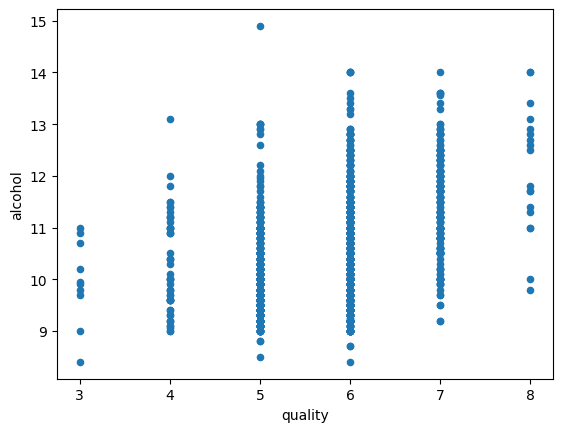

In [95]:
vinos.plot(kind="scatter",
           x="quality",
           y = "alcohol")

In [108]:
def ranker(df):
    df["alc_content_rank"] = np.arange(len(df)) + 1
    return df

In [111]:
vinos_ordenados = vinos.sort_values('alcohol', ascending = False)

In [112]:
vinos_ordenados = vinos_ordenados.groupby('quality').apply(ranker)

C:\Users\jcge9\AppData\Local\Temp\ipykernel_4892\2212042058.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  vinos_ordenados = vinos_ordenados.groupby('quality').apply(ranker)


In [115]:
vinos_ordenados[["alcohol", "quality", "alc_content_rank"]].head(n=12)

,alcohol,quality,alc_content_rank
652,14.9,5,1
588,14.0,8,1
142,14.0,6,1
144,14.0,6,2
1270,14.0,6,3
1269,14.0,8,2
467,14.0,6,4
821,14.0,7,1
1114,13.6,6,5
1228,13.6,7,2


In [116]:
num_of_qual = vinos_ordenados['quality'].value_counts()

In [117]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [118]:
vinos_ordenados[vinos_ordenados["alc_content_rank"] == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0.272727,1
